In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib.inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data  = pd.read_csv('Mental_HealthData.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


In [4]:
data.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [5]:
data.shape

(10392, 3)

In [6]:
data.columns

Index(['posts', 'predicted', 'intensity'], dtype='object')

# Null Value Identification and Treatment

In [7]:
data.isnull().sum()






posts        1
predicted    0
intensity    0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()


posts        0
predicted    0
intensity    0
dtype: int64

# Target Class Evaluation

In [9]:
data['predicted'].unique()  # 4 different output class

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

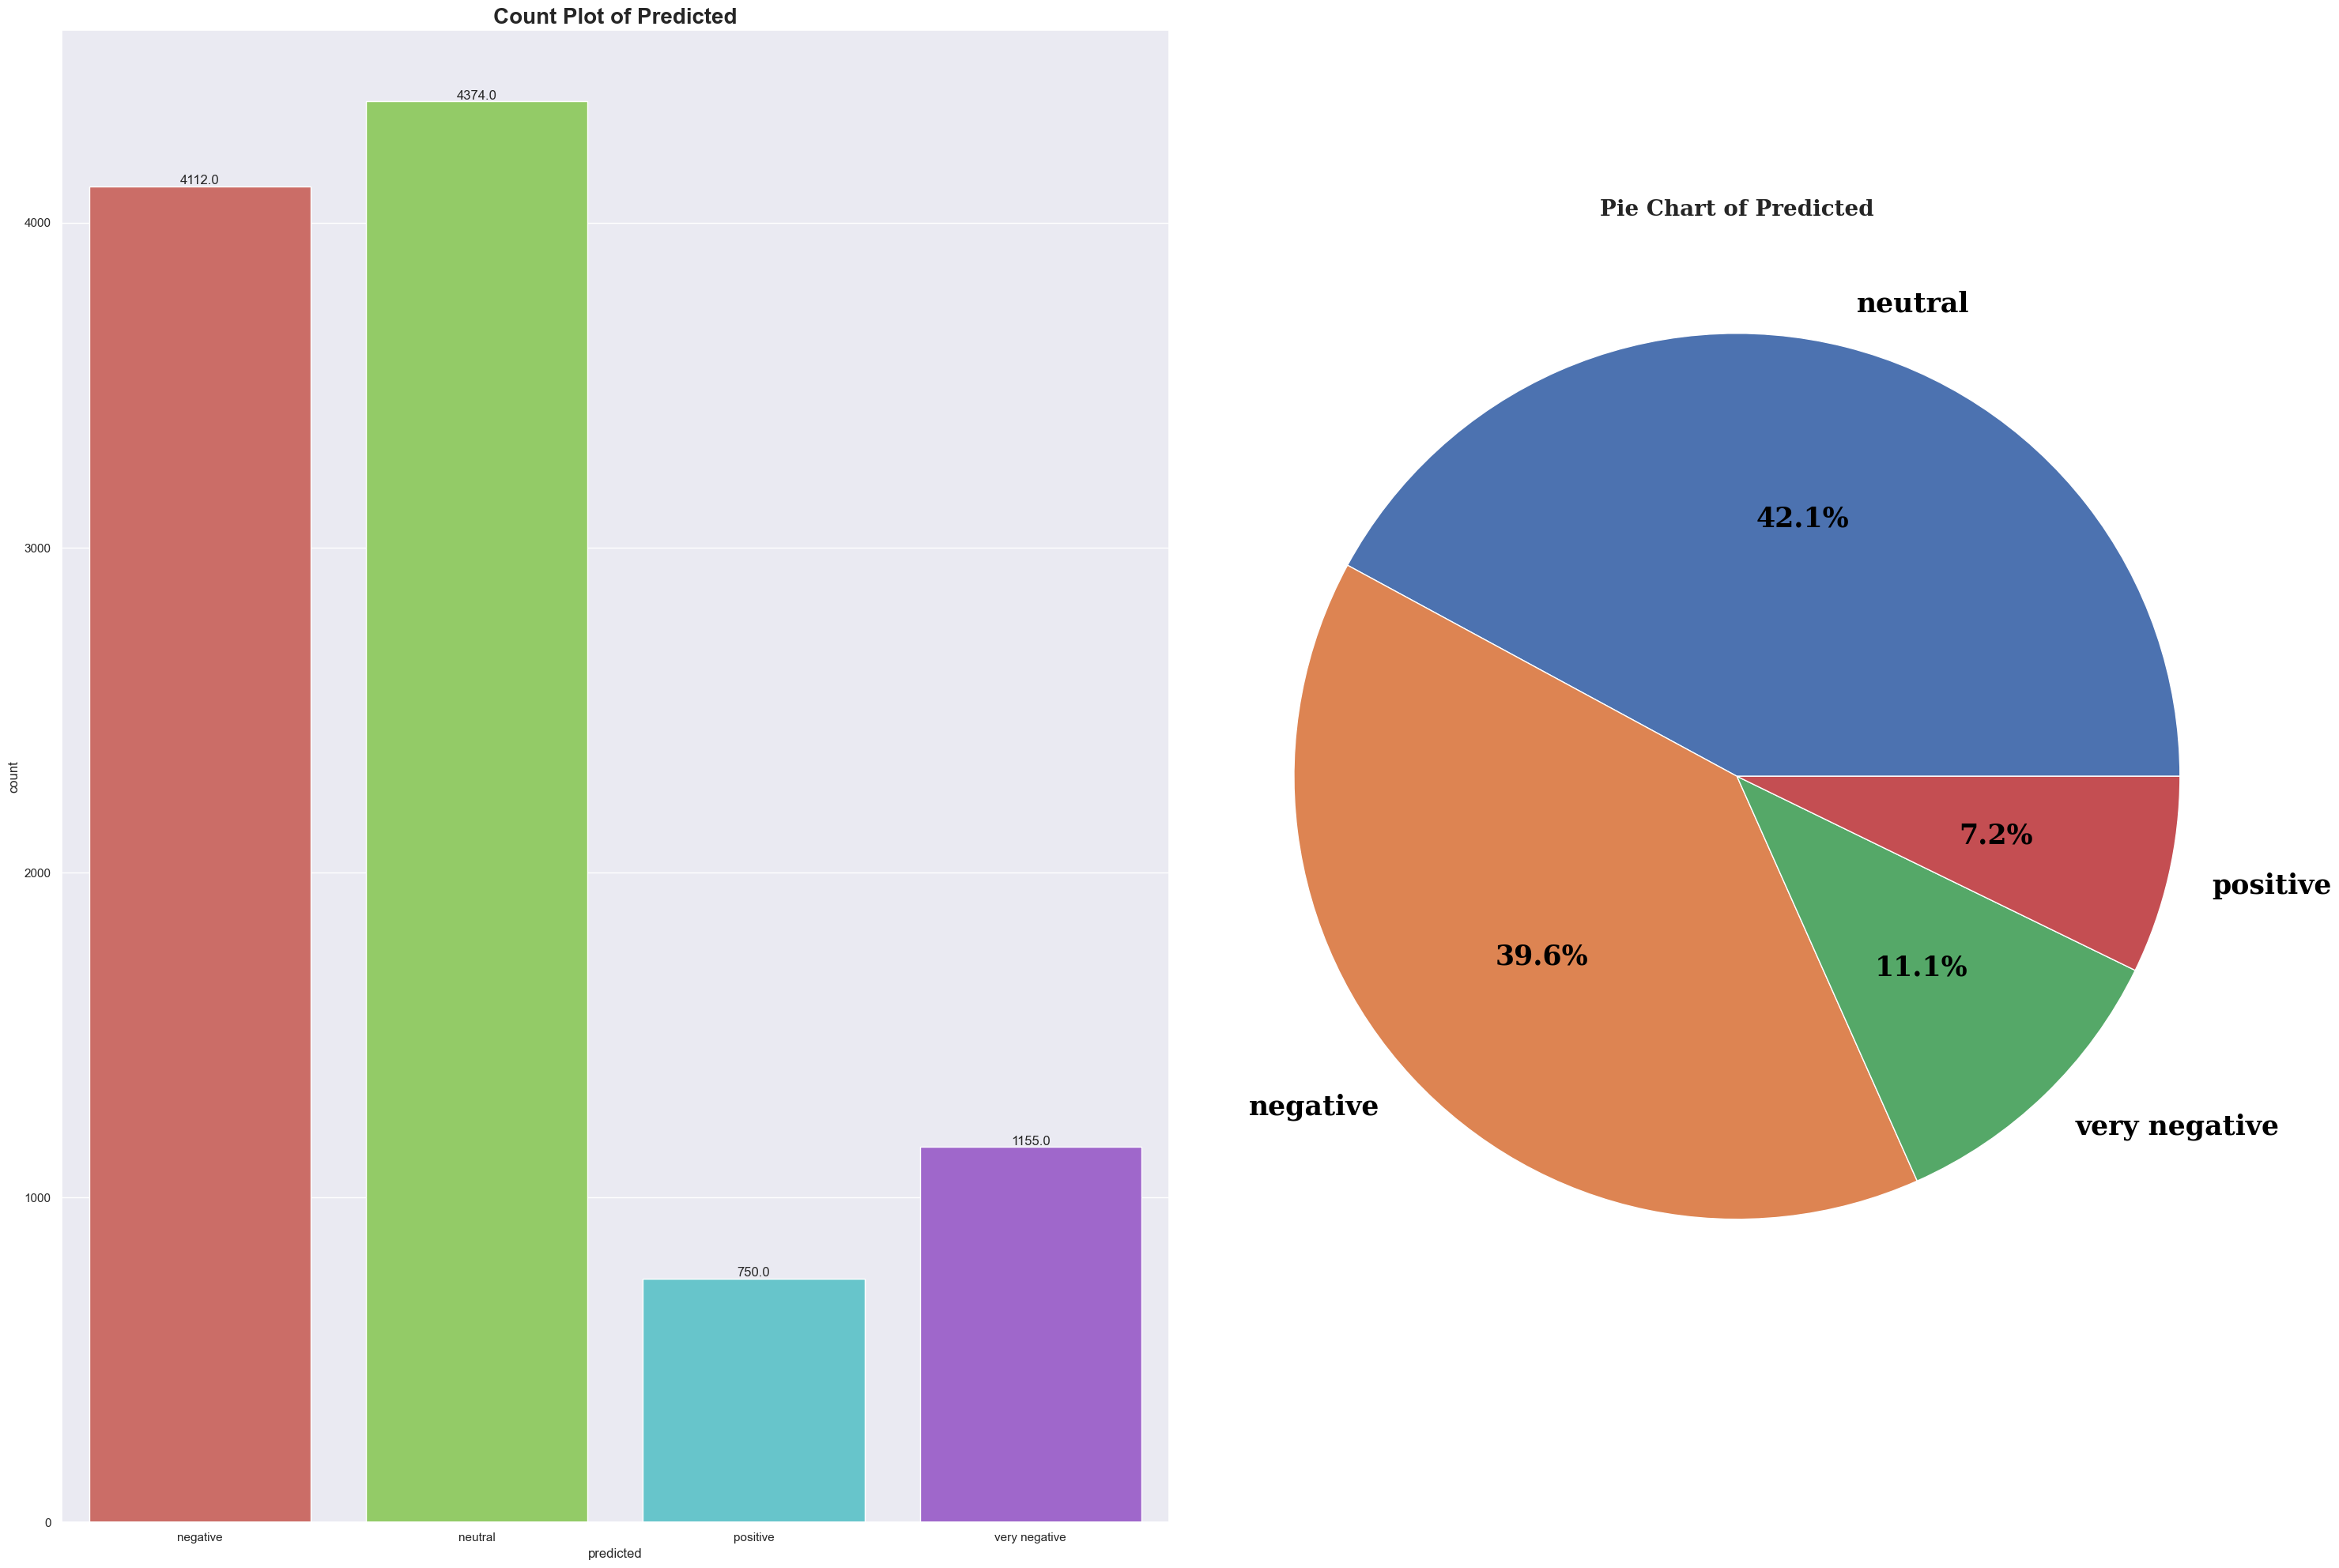

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots: one for the count plot and one for the pie chart
fig, axs = plt.subplots(1, 2, figsize=(30, 20))

# Plot 1: Count plot
ax = sns.countplot(x=data['predicted'], palette='hls', ax=axs[0])

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

axs[0].set_title('Count Plot of Predicted', size=20, fontweight='bold')

# Plot 2: Pie chart
predicted_counts = data['predicted'].value_counts()
axs[1].pie(predicted_counts, labels=predicted_counts.index,
          autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black', 'weight':'bold', 'family':'serif'})
axs[1].set_title('Pie Chart of Predicted', size=20, fontweight='bold', family='serif')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


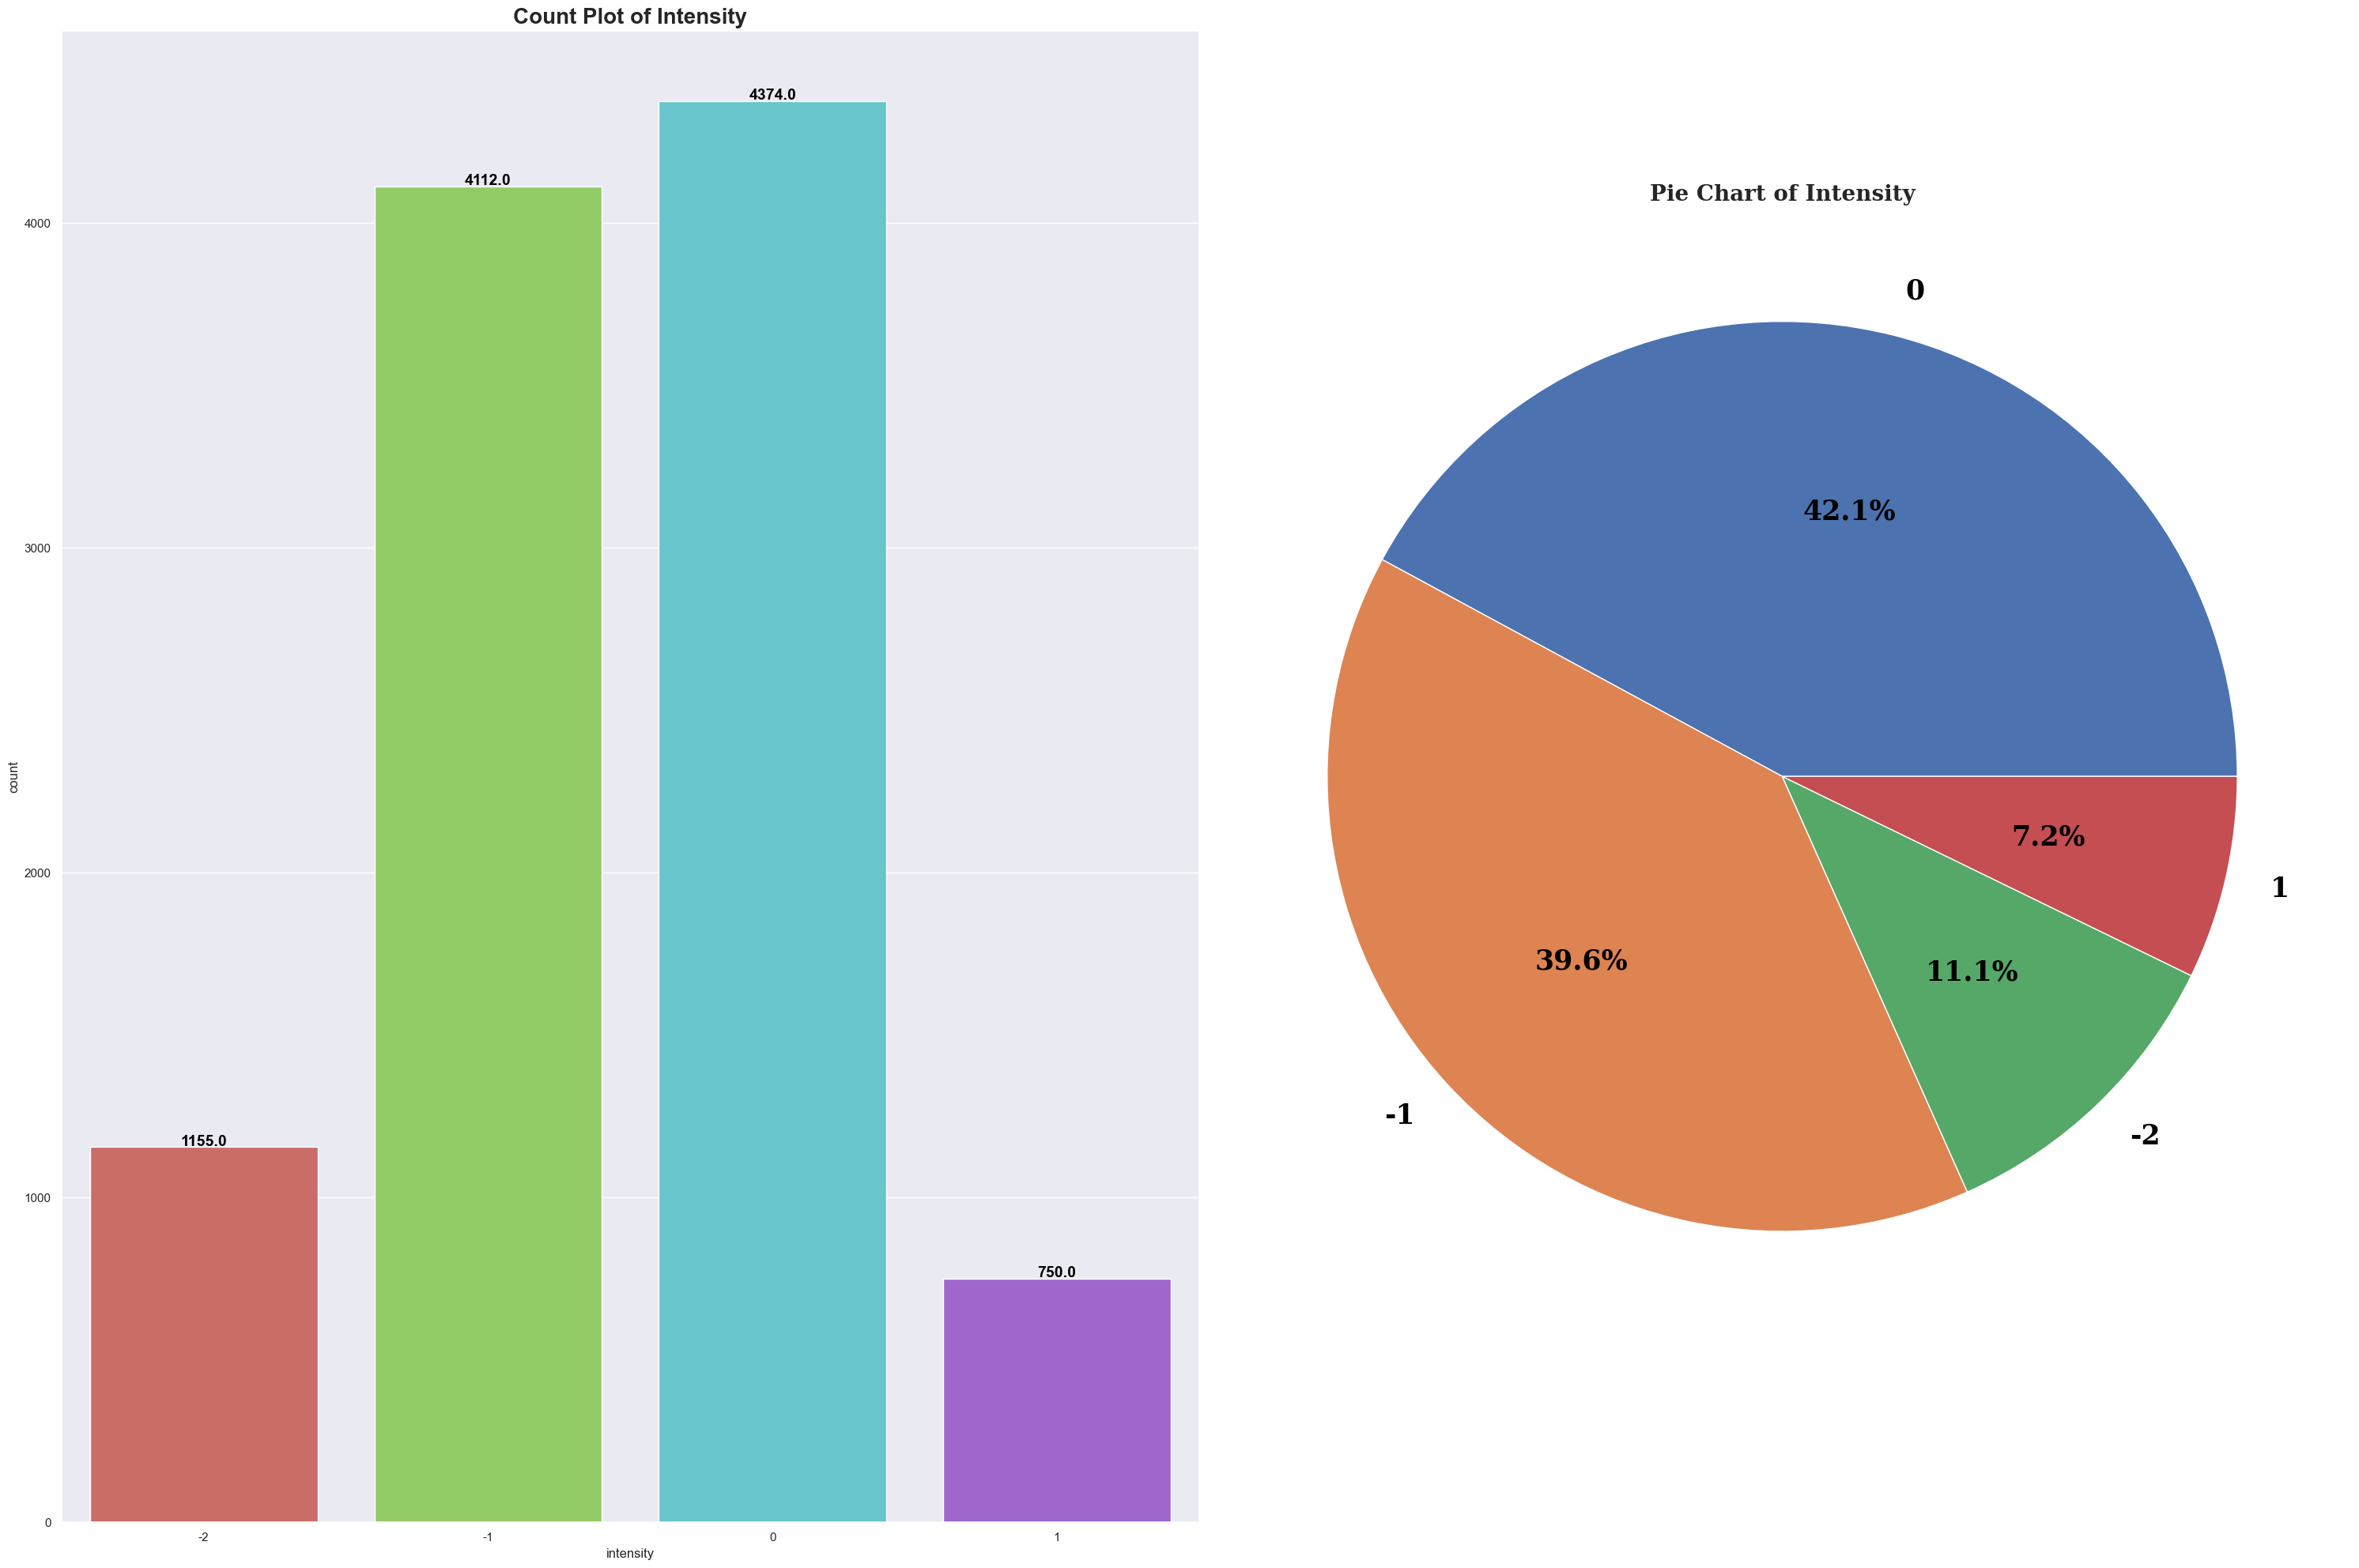

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots: one for the count plot and one for the pie chart
fig, axs = plt.subplots(1, 2, figsize=(30, 20))

# Count plot
sns.countplot(x='intensity', data=data, palette='hls', ax=axs[0])

# Annotate each bar with the count value
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', 
                    fontsize=14, fontweight='bold', color='black')

axs[0].set_title('Count Plot of Intensity', size=20, fontweight='bold')

# Pie chart
intensity_counts = data['intensity'].value_counts()
axs[1].pie(intensity_counts, labels=intensity_counts.index,
          autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black', 'weight':'bold', 'family':'serif'})
axs[1].set_title('Pie Chart of Intensity', size=20, fontweight='bold', family='serif')

# Display the plots
plt.tight_layout()
plt.show()


In [12]:
data.posts[589]

'my initial diagnosis for depression was in 2002 after undergo several surgery to my spine one surgery hope the pain would stop I could go back to work turn into ten fail surgery leave I disabled can not work in a wheelchair my life end the depression constant chronic pain stress diabete leukemia chemo infusion blood transfusion blood platelet infusion sleep apnea nerve damage pain pain pain I have suicidal thought daily with all the medication I have at my hand it would be easy there is no meaning in my life lastnight I call 9 1 1 to have they go to my son apartment as he was talk crazy think crazy thought he want to try again one week prior he spend 7 day in a psychiatric hospital after slash both his wrist he is an alcoholic drug addict lastnight was the third attempt to kill himself just 24 hour after being discharge he was not ready to be discharge but they do because his insurance time out for that kind of treatment his addiction to alcohol pain pill have been steady for over 4 y

# Cleaning data

In [13]:
df_new = data.copy()

In [14]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [15]:
# Taking care of text sensitiveness

df_new['posts'] = df_new['posts'].apply(lambda x:clean_text(x))

In [34]:
# taking care of string punctuation

import string
string.punctuation

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [48]:
df_new['posts'] = df_new['posts'].apply(lambda x:remove_punctuation(x))

In [49]:
# Word Tokenization 

#import re
#def tokenization(text):
    #tokens = re.split('W+', text)
    #return tokens

In [50]:
#df_new['posts'] = df_new['posts'].apply(lambda x:tokenization(x))

In [51]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [53]:
import nltk
from wordcloud import WordCloud


In [54]:
nltk.download('vader_lexicon')  # you can use any language   #Corpus#document#vocabulary(Unique words)#Word(per para graph count)
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadaanbaccha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadaanbaccha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [57]:
df_new['posts'] = df_new['posts'].apply(lambda x:remove_stopwords(x))

In [58]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [59]:
from nltk.stem import WordNetLemmatizer

In [60]:
wordnet_lemmatizer = WordNetLemmatizer()

In [61]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [67]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadaanbaccha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
df_new['posts'] = df_new['posts'].apply(lambda x:lemmatizer(x))

In [69]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [70]:
def remove_digits(text):
    clean_text = re.sub('[^a-z]+',' ', text)
    return clean_text

In [71]:
df_new['posts'] = df_new['posts'].apply(lambda x:remove_digits(x))

In [72]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390     year old father much past year really need tr...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [73]:
df_new

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,negative,-1
10388,surgery stage colon cancer year ago cea level ...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,year old father much past year really need tr...,neutral,0


In [74]:
df1 = df_new[['predicted','posts']]
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


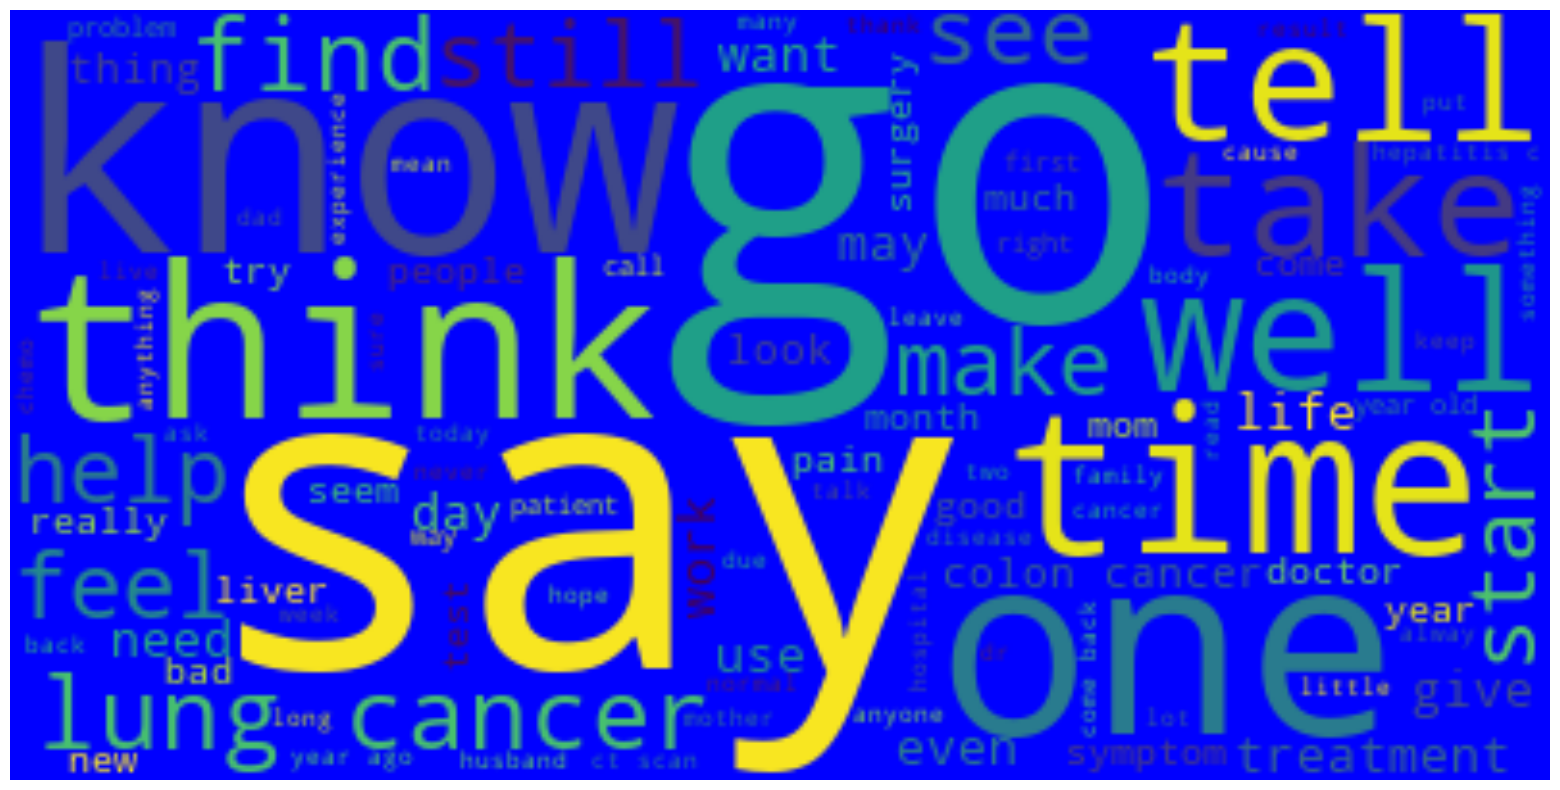

In [75]:
text_data = ' '.join(df1['posts'])
wordcloud = WordCloud(background_color='blue').generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

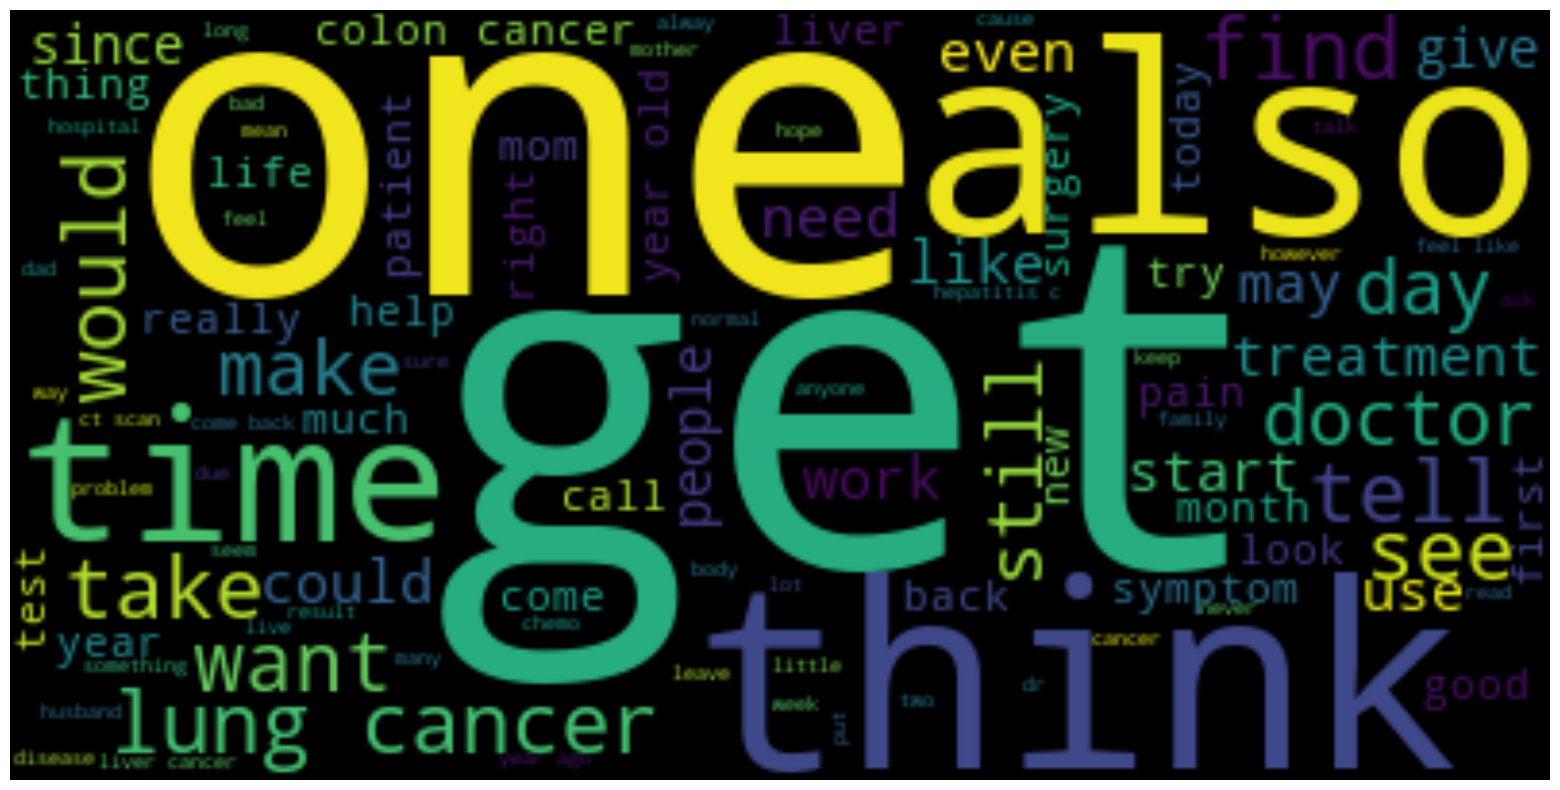

In [76]:
wcloud = WordCloud(max_words=100,background_color='black', stopwords = ['go','say','know','well']).generate(text_data)
#wcolud.generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

In [77]:
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


In [78]:
!pip install contractions   #  to handle unstructure (text data)

In [79]:
from tqdm import tqdm
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re
import nltk
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

preprocessed_reviews = []

for sentence in tqdm(df1['posts'].values):
  sentence = contractions.fix(sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = re.sub(r"https\S+","", sentence)
  sentence = re.sub("\S*\d\S*","", sentence).strip()
  sentence = re.sub('[^a-zA-Z\s]+'," ", sentence)
  tokens = sentence.split()
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
  cleaned_sentence = ' '.join(tokens).lower()
  preprocessed_reviews.append(cleaned_sentence.strip())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadaanbaccha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadaanbaccha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|████████████████████████████████████| 10391/10391 [00:15<00:00, 662.35it/s]


In [80]:
preprocessed_reviews

['know parent child syndrome hear child high risk leukemia parent read say well happen child well turn yr old start bruise thought leukemia breafly cross mind quickly push mind rationalize say rough playing yr old normal bruise go work month get little fussy whinny normal right well get sick like lot child get sick get sick take doc friday say cold tell bos sick surpise call say hospital offten get sick say ok sit get sure enough much sicker take er tell rsv send home med time get home much bad take back time order test put hospital world start come around first say blood work come back bad want retest probley nothing come back say want move icu keep well start get scared thought come back leukemia put try push mind one want think bad well long doc come say believe william leukemia quickly fly beaumont tx houston tx texas childrens hospital really well remision still yr chemo run around walk anymore due one chemos vinchristin come back find way get around nothing go slow dow write say 

In [81]:
len(preprocessed_reviews)

10391

# Feature Engineering


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [83]:
tf_idf_vect = TfidfVectorizer(max_features=1000)
tf_idf_vect.fit(preprocessed_reviews)
print('feature names :', tf_idf_vect.get_feature_names_out()[5000:5050])
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("Count vectorizer :", type(final_counts_tfidf))

feature names : []
Count vectorizer : <class 'scipy.sparse._csr.csr_matrix'>


In [84]:
final_counts_tfidf.shape

(10391, 1000)

In [85]:
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews).toarray()

In [86]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.183291
1,0.0,0.0,0.0,0.032195,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.017415,0.0,0.0,0.0,0.033676,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.053975,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073761,0.0,0.0,0.035772,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [87]:
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


In [88]:
y = df1['predicted']
x = final_counts_tfidf

In [89]:
y.value_counts()

neutral          4374
negative         4112
very negative    1155
positive          750
Name: predicted, dtype: int64

In [90]:
from sklearn.preprocessing  import LabelEncoder
label = LabelEncoder()
y_label = label.fit_transform(y)
y_label

array([0, 1, 0, ..., 1, 1, 0])

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.2, random_state=42, stratify=y)

In [93]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c4/41/f0980f72531ab8e1fdbeb2643c32f6bcc7e8777fa49e362f94d728887a58/xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [95]:
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [96]:
from sklearn.metrics import classification_report, accuracy_score

In [97]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9781039461020212
**********************************************************************************************************************************
Test Accuracy : 0.7133237133237134
